# Install and Import Packages

In [ ]:
## install required packages
!pip install swig
!pip install wrds
!pip install pyportfolioopt
## install finrl library
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into acco

In [ ]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers
from finrl.config import INDICATORS

import itertools

In [ ]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2023-05-01'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
symbols = [
    'aapl',
    'msft',
    'meta',
    'ibm',
    'hd',
    'cat',
    'amzn',
    'intc',
    't',
    'v'
    'gs'
]

In [ ]:
df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
                                end_date = TRADE_END_DATE,
                                ticker_list = symbols).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (32958, 8)


In [ ]:
df_raw.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.737004,746015200,aapl,4
1,2009-01-02,2.567500,2.726500,2.553500,2.718000,145928000,amzn,4
2,2009-01-02,44.910000,46.980000,44.709999,30.712517,7117200,cat,4
3,2009-01-02,23.070000,24.190001,22.959999,16.435904,14902500,hd,4
4,2009-01-02,80.200768,83.738052,80.200768,48.733891,7905877,ibm,4


# Preprocess Data

In [ ]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_vix=True,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Successfully added technical indicators


[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (3604, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
processed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,3.067143,3.251429,3.041429,2.737004,746015200,aapl,4,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,2.737004,2.737004,39.189999,0.000000
1,2009-01-02,2.567500,2.726500,2.553500,2.718000,145928000,amzn,4,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,2.718000,2.718000,39.189999,0.000000
2,2009-01-02,44.910000,46.980000,44.709999,30.712517,7117200,cat,4,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,30.712517,30.712517,39.189999,0.000000
3,2009-01-02,23.070000,24.190001,22.959999,16.435904,14902500,hd,4,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,16.435904,16.435904,39.189999,0.000000
4,2009-01-02,80.200768,83.738052,80.200768,48.733891,7905877,ibm,4,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,48.733891,48.733891,39.189999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28827,2023-04-27,288.000000,294.709991,287.799988,284.353882,3133600,hd,3,0.856021,292.924508,275.919700,48.591918,15.318528,7.315064,281.480982,287.986492,17.030001,5.475575
28828,2023-04-27,126.370003,127.019997,125.459999,119.107491,3204900,ibm,3,-0.770918,124.905765,116.251009,44.911385,-38.511364,1.220107,119.846375,121.489780,17.030001,5.475575
28829,2023-04-27,28.750000,29.950001,28.510000,29.144178,60186200,intc,3,-0.018558,33.393174,28.197083,50.727391,-66.435400,13.482737,30.099059,28.330523,17.030001,5.475575
28830,2023-04-27,295.970001,305.200012,295.250000,301.261169,46462600,msft,3,5.080237,295.548234,272.647722,63.072945,228.756399,42.136850,280.462549,267.492230,17.030001,5.475575


In [ ]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_full

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,aapl,3.067143,3.251429,3.041429,2.737004,746015200.0,4.0,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,2.737004,2.737004,39.189999,0.000000
1,2009-01-02,amzn,2.567500,2.726500,2.553500,2.718000,145928000.0,4.0,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,2.718000,2.718000,39.189999,0.000000
2,2009-01-02,cat,44.910000,46.980000,44.709999,30.712517,7117200.0,4.0,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,30.712517,30.712517,39.189999,0.000000
3,2009-01-02,hd,23.070000,24.190001,22.959999,16.435904,14902500.0,4.0,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,16.435904,16.435904,39.189999,0.000000
4,2009-01-02,ibm,80.200768,83.738052,80.200768,48.733891,7905877.0,4.0,0.000000,2.958119,2.631402,100.000000,66.666667,100.000000,48.733891,48.733891,39.189999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41827,2023-04-27,hd,288.000000,294.709991,287.799988,284.353882,3133600.0,3.0,0.856021,292.924508,275.919700,48.591918,15.318528,7.315064,281.480982,287.986492,17.030001,5.475575
41828,2023-04-27,ibm,126.370003,127.019997,125.459999,119.107491,3204900.0,3.0,-0.770918,124.905765,116.251009,44.911385,-38.511364,1.220107,119.846375,121.489780,17.030001,5.475575
41829,2023-04-27,intc,28.750000,29.950001,28.510000,29.144178,60186200.0,3.0,-0.018558,33.393174,28.197083,50.727391,-66.435400,13.482737,30.099059,28.330523,17.030001,5.475575
41830,2023-04-27,msft,295.970001,305.200012,295.250000,301.261169,46462600.0,3.0,5.080237,295.548234,272.647722,63.072945,228.756399,42.136850,280.462549,267.492230,17.030001,5.475575


# Save the Data

In [ ]:
# Split the data
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


23144
5688


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

train_path = '/content/drive/My Drive/train.csv'
trade_path = '/content/drive/My Drive/trade.csv'

with open(train_path, 'w', encoding = 'utf-8-sig') as f:
  train.to_csv(f)

with open(trade_path, 'w', encoding = 'utf-8-sig') as f:
  trade.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Consider Joining the Newsleter

https://witty-motivator-1414.ck.page/acb393f729

# Setup installs & imports

In [ ]:
import os
import pandas as pd

from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl import config_tickers
from finrl.main import check_and_make_directories
from finrl.config import INDICATORS, TRAINED_MODEL_DIR, RESULTS_DIR
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

%matplotlib inline
from matplotlib import pyplot as plt
from finrl.config import INDICATORS

check_and_make_directories([TRAINED_MODEL_DIR])

# Load the Data from Part 1

In [ ]:
train = pd.read_csv('/content/drive/My Drive/train.csv')

train = train.set_index(train.columns[0])
train.index.names = ['']

## Setup Environment

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 8, State Space: 81


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

### Environment for Training

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


# Train Agent

In [ ]:
agent = DRLAgent(env = env_train)

# Set the corresponding values to 'True' for the algorithms that you want to use
if_using_a2c = True
if_using_ddpg = False
if_using_ppo = True
if_using_td3 = False
if_using_sac = False

## A2C Model

The code above and below provide a healthy framework to add different agent types for training within the same notebook. For this I'll only be training an a2c model, but may add ddpg, ppo, and td3 in later iterations.

In [ ]:
model_a2c = agent.get_model("a2c")
model_ppo = agent.get_model('ppo')

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device
{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 64}
Using cuda device
Logging to results/a2c
Logging to results/ppo


In [ ]:
trained_a2c = agent.train_model(model=model_a2c,
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=50000) if if_using_ppo else None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---------------------------------------
| time/                 |             |
|    fps                | 135         |
|    iterations         | 100         |
|    time_elapsed       | 3           |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -11.4       |
|    explained_variance | -0.546      |
|    learning_rate      | 0.0007      |
|    n_updates          | 99          |
|    policy_loss        | -0.214      |
|    reward             | -0.11129017 |
|    std                | 1.01        |
|    value_loss         | 0.53        |
---------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 146       |
|    iterations         | 200       |
|    time_elapsed       | 6         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -11.5     |
|    explained_variance | 0         |
|    learning_rate

In [ ]:
trained_a2c.save(TRAINED_MODEL_DIR + "/agent_a2c") if if_using_a2c else None
trained_ppo.save(TRAINED_MODEL_DIR + "/agent_ppo") if if_using_ppo else None

# Backtesting

In [ ]:
train = pd.read_csv('/content/drive/My Drive/train.csv')
trade = pd.read_csv('/content/drive/My Drive/trade.csv')

train = train.set_index(train.columns[0])
train.index.names = ['']
trade = trade.set_index(trade.columns[0])
trade.index.names = ['']

In [ ]:
if_using_a2c = True
if_using_ddpg = False
if_using_ppo = False
if_using_td3 = False
if_using_sac = False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trained_a2c = A2C.load('/content/trained_models/agent_a2c') if if_using_a2c else None
trained_ddpg = DDPG.load("agent_ddpg") if if_using_ddpg else None
trained_ppo = PPO.load("/content/trained_models/agent_ppo") if if_using_ppo else None
trained_td3 = TD3.load("agent_td3") if if_using_td3 else None
trained_sac = SAC.load("agent_sac") if if_using_sac else None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Out-of-Sample Performance

In [ ]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 8, State Space: 81


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [ ]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [ ]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment = e_trade_gym) if if_using_a2c else (None, None)

hit end!


# Mean Variance Optimization

MVO will be the baseline to compare our agent performance

In [ ]:
# Helps us process data into a form for weight calculation
def process_df_for_mvo(df):
  df = df.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]
  fst = df
  fst = fst.iloc[0:stock_dimension, :]
  tic = fst['tic'].tolist()

  mvo = pd.DataFrame()

  for k in range(len(tic)):
    mvo[tic[k]] = 0

  for i in range(df.shape[0]//stock_dimension):
    n = df
    n = n.iloc[i * stock_dimension:(i+1) * stock_dimension, :]
    date = n['date'][i*stock_dimension]
    mvo.loc[date] = n['close'].tolist()

  return mvo

# Calculates weights of average return and covariance matrix
def StockReturnsComputing(StockPrice, Rows, Columns):
  import numpy as np
  StockReturn = np.zeros([Rows-1, Columns])
  for j in range(Columns):        # j: Assets
    for i in range(Rows-1):     # i: Daily Prices
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

  return StockReturn

In [ ]:
StockData = process_df_for_mvo(train)
TradeData = process_df_for_mvo(trade)

TradeData.to_numpy()

array([[ 88.7960434 , 143.93499756, 115.20432281, ...,  52.42576981,
        197.26823425,  16.28933334],
       [ 88.7960434 , 144.51499939, 116.72138214, ...,  52.71102905,
        198.77154541,  16.38739586],
       [ 91.17138672, 152.852005  , 118.28411865, ...,  53.07652283,
        203.05039978,  16.61076736],
       ...,
       [162.49176025, 102.56999969, 213.78308105, ...,  28.18766975,
        272.19552612,  16.10049438],
       [162.48182678, 104.98000336, 211.39715576, ...,  28.35359764,
        291.91189575,  15.81544685],
       [167.09555054, 109.81999969, 209.57839966, ...,  29.14417839,
        301.26116943,  16.19244576]])

In [ ]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

Mean returns of assets in k-portfolio 1
 [0.136 0.158 0.066 0.103 0.033 0.076 0.103 0.038]
Variance-Covariance matrix of returns
 [[3.156 1.592 1.722 1.303 1.218 1.674 1.561 0.876]
 [1.592 4.533 1.657 1.299 1.158 1.516 1.808 0.761]
 [1.722 1.657 4.019 1.577 1.513 1.929 1.711 1.187]
 [1.303 1.299 1.577 2.373 1.166 1.501 1.366 0.953]
 [1.218 1.158 1.513 1.166 2.052 1.399 1.296 0.944]
 [1.674 1.516 1.929 1.501 1.399 3.289 1.9   1.034]
 [1.561 1.808 1.711 1.366 1.296 1.9   2.759 0.916]
 [0.876 0.761 1.187 0.953 0.944 1.034 0.916 1.577]]


### Calculate the efficient Frontier to get weights

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.5))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([1000000 * cleaned_weights_mean[i] for i in range(8)])

mvo_weights

array([412090., 358860.,      0., 229050.,      0.,      0.,      0.,
            0.])

### Apply the weights to the last price of our stock data

In [ ]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)

Initial_Portfolio

array([4632.082, 2601.547,    0.   , 1007.024,    0.   ,    0.   ,
          0.   ,    0.   ])

### Test our MVO weights on the out-of-sample data

In [ ]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])

MVO_result

,Mean Var
2020-07-01,1.012656e+06
2020-07-02,1.014485e+06
2020-07-06,1.048137e+06
2020-07-07,1.037411e+06
2020-07-08,1.059416e+06
...,...
2023-04-21,1.328985e+06
2023-04-24,1.330017e+06
2023-04-25,1.308205e+06
2023-04-26,1.306382e+06


# DOW JONES Index as Another Baseline

In [ ]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2023-05-01'

In [ ]:
df_dji = YahooDownloader(start_date = TRADE_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = ['^dji']).fetch_data()

[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (712, 8)


In [ ]:
df_dji = df_dji[['date','close']]
fst_day = df_dji['close'][0]
dji = pd.merge(df_dji['date'], df_dji['close'].div(fst_day).mul(1000000),
               how='outer', left_index=True, right_index=True).set_index('date')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0]) if if_using_a2c else None

result = pd.DataFrame()
if if_using_a2c: result = pd.merge(result, df_result_a2c, how='outer', left_index=True, right_index=True)

# Merge DataFrames and view Results

In [ ]:
col_name = []
col_name.append('A2C') if if_using_a2c else None
result.columns = col_name

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result = pd.merge(result, MVO_result, how='outer', left_index=True, right_index=True)
result = pd.merge(result, dji, how='outer', left_index=True, right_index=True).fillna(method='bfill')

<ipython-input-49-9cfe681e3b58>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = pd.merge(result, dji, how='outer', left_index=True, right_index=True).fillna(method='bfill')


In [ ]:
result

,A2C,Mean Var_x,close_x,Mean Var_y,close_y
2020-07-01,1.000000e+06,1.012656e+06,1.000000e+06,1.012656e+06,1.000000e+06
2020-07-02,1.000357e+06,1.014485e+06,1.003590e+06,1.014485e+06,1.003590e+06
2020-07-06,1.003073e+06,1.048137e+06,1.021452e+06,1.048137e+06,1.021452e+06
2020-07-07,9.999943e+05,1.037411e+06,1.006031e+06,1.037411e+06,1.006031e+06
2020-07-08,1.004417e+06,1.059416e+06,1.012913e+06,1.059416e+06,1.012913e+06
...,...,...,...,...,...
2023-04-24,1.220479e+06,1.330017e+06,1.316318e+06,1.330017e+06,1.316318e+06
2023-04-25,1.193595e+06,1.308205e+06,1.302929e+06,1.308205e+06,1.302929e+06
2023-04-26,1.178745e+06,1.306382e+06,1.294032e+06,1.306382e+06,1.294032e+06
2023-04-27,1.196049e+06,1.346053e+06,1.314404e+06,1.346053e+06,1.314404e+06


<Axes: >

<Figure size 1500x500 with 0 Axes>

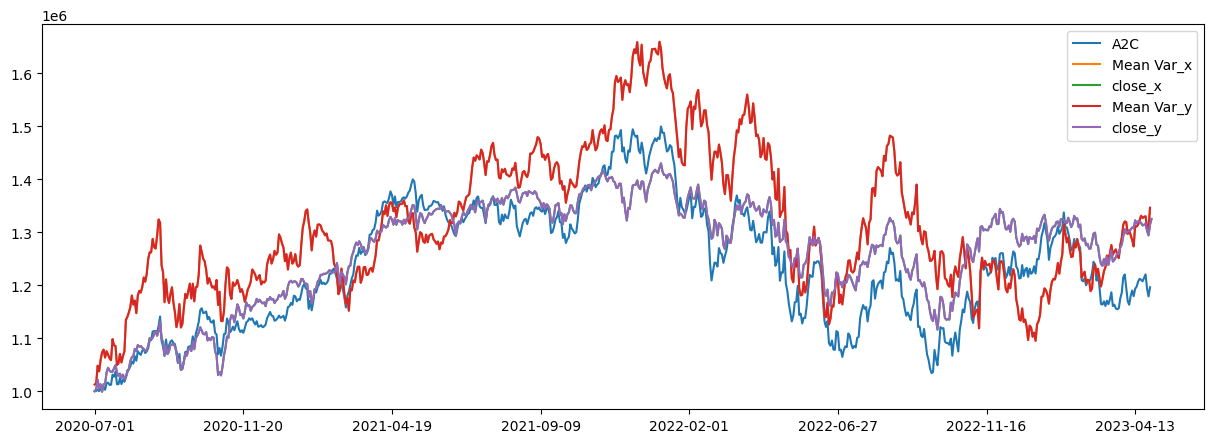

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()

#Backtest for PPO

In [ ]:
if_using_a2c = False
if_using_ddpg = False
if_using_ppo = True
if_using_td3 = False
if_using_sac = False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from stable_baselines3 import PPO

trained_ppo = PPO.load("/content/trained_models/agent_ppo")  # Replace with the actual path

df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo,
    environment=e_trade_gym
) if if_using_ppo else (None, None)

hit end!


In [ ]:
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0]) if if_using_ppo else None

result = pd.DataFrame()
if if_using_ppo: result = pd.merge(result, df_result_ppo, how='outer', left_index=True, right_index=True)

In [ ]:
col_name = []
col_name.append('PPO') if if_using_ppo else None
result.columns = col_name

In [ ]:
result = pd.merge(result, MVO_result, how='outer', left_index=True, right_index=True)
result = pd.merge(result, dji, how='outer', left_index=True, right_index=True).fillna(method='bfill')

<ipython-input-59-9cfe681e3b58>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = pd.merge(result, dji, how='outer', left_index=True, right_index=True).fillna(method='bfill')


In [ ]:
result

,PPO,Mean Var,close
date,,,
2020-07-01,1.000000e+06,1.012656e+06,1.000000e+06
2020-07-02,1.000059e+06,1.014485e+06,1.003590e+06
2020-07-06,1.000283e+06,1.048137e+06,1.021452e+06
2020-07-07,9.997587e+05,1.037411e+06,1.006031e+06
2020-07-08,1.000250e+06,1.059416e+06,1.012913e+06
...,...,...,...
2023-04-24,1.241019e+06,1.330017e+06,1.316318e+06
2023-04-25,1.224152e+06,1.308205e+06,1.302929e+06
2023-04-26,1.204303e+06,1.306382e+06,1.294032e+06


<Axes: xlabel='date'>

<Figure size 1500x500 with 0 Axes>

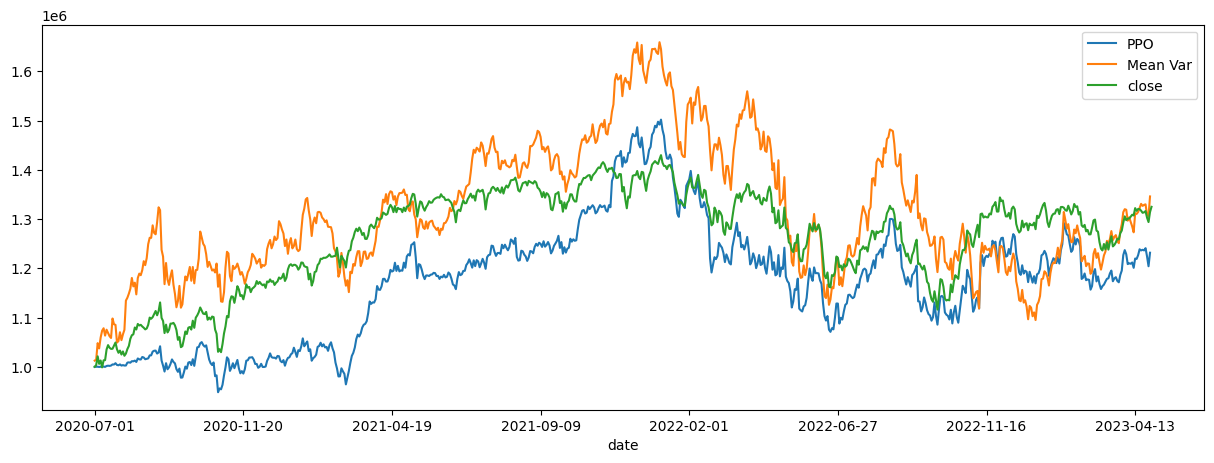

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()